In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

In [2]:
sns.set(color_codes=True)

In [3]:
# read csv file from Thinkful github
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


    1.  cntry = country 
    2.  year = year                                 
        ( 2012 = 6 , 2014 = 7 )
    3.  idno = ID 
    4.  tvtot = average time watching TV            
        ( 0 - 7 )     7  -> more than 3 hours
    5.  ppltrst = most people can be trusted        
         ( 0 - 10 )    10 -> being trusted
    6.  pplfair = most people take advantage of you      
         ( 0 - 10 )    10 -> being fair
    7.  pplhlp = most people are helpful            
        ( 0 - 10 )    10 -> being helpful
    8.  happy = how happy are you                   
        ( 0 - 10 )    10 -> being happy
    9.  sclmeet = how often socially meet           
        ( 1 - 7 )     7  -> everyday
    10. sclact = take part in social activities     
        ( 1 - 5 )     5  -> much more than others
    11. gndr                                        
        ( 1 = male , 2 = female )
    12. agea                       
    13. partner                                     
        ( 1 = has partner, 2 = no partner )

#### Alpha Value
   For the questions in this challenge, I am setting the alpha value to be ** 0.05 **

##### Question 1:
    Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [161]:
# create a new dataframe for question 1
df_1 = pd.DataFrame()
df_1['ppltrst_2012'] = df['ppltrst'].loc[df.year == 6].reset_index(drop = True)
df_1['ppltrst_2014'] = df['ppltrst'].loc[df.year == 7].reset_index(drop = True)

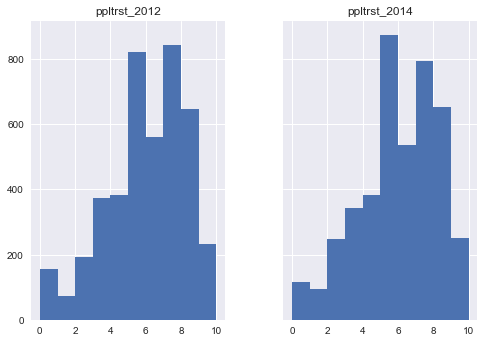

In [162]:
df_1.hist(sharey=True,sharex=True)
plt.show()

In [163]:
# since the histograms appear to be non-normal

# join two samples into a list and create ranks for them
ranks_1 = stats.rankdata(
    df_1['ppltrst_2012'].tolist() + 
    df_1['ppltrst_2014'].tolist())

# add new ranked variable
df_1['Rank_ppltrst_2012'] = ranks_1[0:df_1.shape[0]]
df_1['Rank_ppltrst_2014'] = ranks_1[df_1.shape[0]:len(ranks_1)]

# average rank per group
groups = ['Rank_ppltrst_2012', 'Rank_ppltrst_2014']
print(df_1[groups].apply(np.mean))

# overall average rank.
print('\nOverall Average Rank', np.mean(ranks_1))

# use kruskal-wallace test 
stats.kruskal(df_1['Rank_ppltrst_2012'], df_1['Rank_ppltrst_2014'])

Rank_ppltrst_2012    4310.806144
Rank_ppltrst_2014    4284.193856
dtype: float64

Overall Average Rank 4297.5


KruskalResult(statistic=0.25267827664596737, pvalue=0.61519550240557663)

    Conclusion:
   It appears that the groups do not differ significantly. The test says there is a 61.5% chance of getting our data if there were no systematic difference between the trust of people in 2012 and 2014.

**___**

##### Question 2:
    Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [158]:
# create a new dataframe for question 2
df_2 = pd.DataFrame()
df_2['happy_2012'] = df['happy'].loc[df.year == 6].reset_index(drop = True)
df_2['happy_2014'] = df['happy'].loc[df.year == 7].reset_index(drop = True)

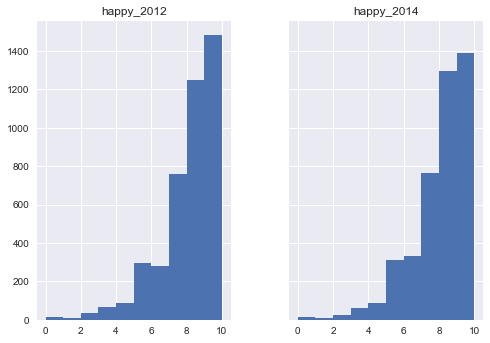

In [159]:
df_2.hist(sharey=True,sharex=True)
plt.show()

In [160]:
# same as Question 1, the histograms appear to be non-normal

# join two samples into a list and create ranks for them
ranks_2 = stats.rankdata(
    df_2['happy_2012'].tolist() + 
    df_2['happy_2014'].tolist())

# add new ranked variable
df_2['Rank_happy_2012'] = ranks_2[0:df_2.shape[0]]
df_2['Rank_happy_2014'] = ranks_2[df_2.shape[0]:len(ranks_2)]

# average rank per group
groups = ['Rank_happy_2012', 'Rank_happy_2014']
print(df_2[groups].apply(np.mean))

# overall average rank.
print('\nOverall Average Rank', np.mean(ranks_2))

# use kruskal-wallace test 
stats.kruskal(df_2['Rank_happy_2012'], df_2['Rank_happy_2014'])

Rank_happy_2012    4361.519549
Rank_happy_2014    4233.480451
dtype: float64

Overall Average Rank 4297.5


KruskalResult(statistic=5.9777723056219321, pvalue=0.014487289811649167)

    Conclusion:
   Since the p-value is less than 0.05, it appears that the difference between the happiness between 2012 and 2014 are statistically significant.

**___**

##### Question 3:
    Who reported watching more TV in 2012, men or women?

In [4]:
# create a temp dataframe for entries in 2012
temp_3 = df.loc[df.year == 6].copy().reset_index(drop = True)

# create a new dataframe for question 3
df_3 = pd.DataFrame()
df_3['TV_watched_men'] = temp_3['tvtot'].loc[temp_3.gndr == 1].reset_index(drop = True)
df_3['TV_watched_women'] = temp_3['tvtot'].loc[temp_3.gndr == 2].reset_index(drop = True)

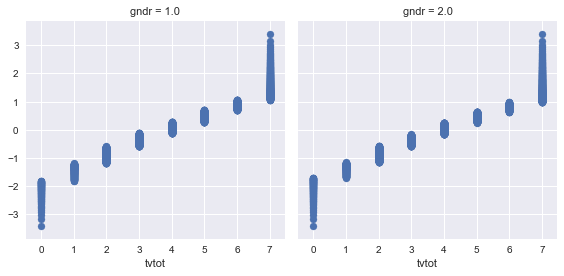

In [5]:
# plot qq-plot to determine normality
def quantile_plot(x, **kwargs): 
    qntls, xr = stats.probplot(x, fit = False)
    plt.scatter(xr, qntls, **kwargs)

g = sns.FacetGrid(temp_3, col = "gndr", size = 4)
g.map(quantile_plot, "tvtot");

In [7]:
# the qq-plot appear to be non-normal

# join two samples into a list and create ranks for them
ranks_3 = stats.rankdata(
    df_3['TV_watched_men'].tolist() + 
    df_3['TV_watched_women'].tolist())

# add new ranked variable
df_3['Rank_TV_watched_men'] = ranks_3[0:df_3.shape[0]]
df_3['Rank_TV_watched_women'] = ranks_3[df_3.shape[0]:len(ranks_3)]

# average rank per group
groups = ['Rank_TV_watched_men', 'Rank_TV_watched_women']
print(df_3[groups].apply(np.mean))

# overall average rank.
print('\nOverall Average Rank', np.mean(ranks_3))

# use kruskal-wallace test 
stat, pval = stats.kruskal(df_3['Rank_TV_watched_men'], df_3['Rank_TV_watched_women'])
print('\ntest statistic:', stat)
print('p-value:', pval)

Rank_TV_watched_men      2134.851671
Rank_TV_watched_women    2174.148329
dtype: float64

Overall Average Rank 2154.5

test statistic: 1.0977136888
p-value: 0.294768402068


    Conclusion:
   After performing Kruskal-Wallace Test. I got results with small test statistics and large p-values, it seems that there are no difference between the amount of TV watched by men and women in 2012.

**___**

##### Question 4:
    Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [8]:
# create a temp dataframe for entries in 2012
temp_4 = df.loc[df.year == 6].copy().reset_index(drop = True)

# create a new dataframe for question 4
df_4 = pd.DataFrame()
df_4['pplfair_partner'] = temp_4['pplfair'].loc[temp_4.partner == 1].reset_index(drop = True)
df_4['pplfair_no_partner'] = temp_4['pplfair'].loc[temp_4.partner == 2].reset_index(drop = True)

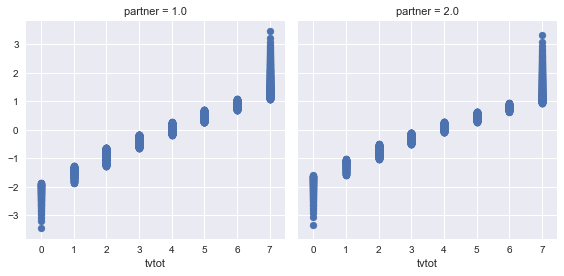

In [9]:
g = sns.FacetGrid(temp_4, col = "partner", size = 4)
g.map(quantile_plot, "tvtot");

In [10]:
# same as question 4, the qq-plot appear to be non-normal

# join two samples into a list and create ranks for them
ranks_4 = stats.rankdata(
    df_4['pplfair_partner'].tolist() + 
    df_4['pplfair_no_partner'].tolist())

# add new ranked variable
df_4['Rank_pplfair_partner'] = ranks_4[0:df_4.shape[0]]
df_4['Rank_pplfair_no_partner'] = ranks_4[df_4.shape[0]:len(ranks_4)]

# average rank per group
groups = ['Rank_pplfair_partner', 'Rank_pplfair_no_partner']
print(df_4[groups].apply(np.mean))

# overall average rank.
print('\nOverall Average Rank', np.mean(ranks_4))

# use kruskal-wallace test 
stat, pval = stats.kruskal(df_4['Rank_pplfair_partner'], df_4['Rank_pplfair_no_partner'])
print('\ntest statistic:', stat)
print('p-value:', pval)

Rank_pplfair_partner       2201.164734
Rank_pplfair_no_partner    3147.835266
dtype: float64

Overall Average Rank 2674.5

test statistic: 509.416276704
p-value: 8.49603477093e-113


    Conclusion:
   I got results with large test statistics and small p-values, it seems that there is a huge difference between the fairness of couples and singles in 2012.
**___**

##### Question 5:
    Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [11]:
# create a temp dataframe for data entries in 2014
temp_5 = df.loc[
    ((df['cntry'] == 'CH') | (df['cntry'] == 'CZ') | 
    (df['cntry'] == 'DE') | (df['cntry'] == 'ES')) & 
    (df['year'] == 7)].reset_index(drop = True)

# create a new dataframe for question 5
df_5 = pd.DataFrame()

# want the country with most entries to be first, so all the rows will be accounted for
# [0] is to get rid of the double bracket in the array
countries = np.asarray(temp_5.groupby('cntry').count().sort_values(by = ['year'], ascending = False)['year'].axes[0])

for cn in countries:
    df_5['{}_sclmeet'.format(cn)] = temp_5['sclmeet'].loc[temp_5.cntry == cn].reset_index(drop = True)

In [13]:
df_5.head()

,ES_sclmeet,CH_sclmeet,CZ_sclmeet,DE_sclmeet
0,7.0,6.0,4.0,4.0
1,2.0,5.0,5.0,4.0
2,7.0,7.0,4.0,6.0
3,7.0,6.0,4.0,4.0
4,7.0,6.0,5.0,4.0


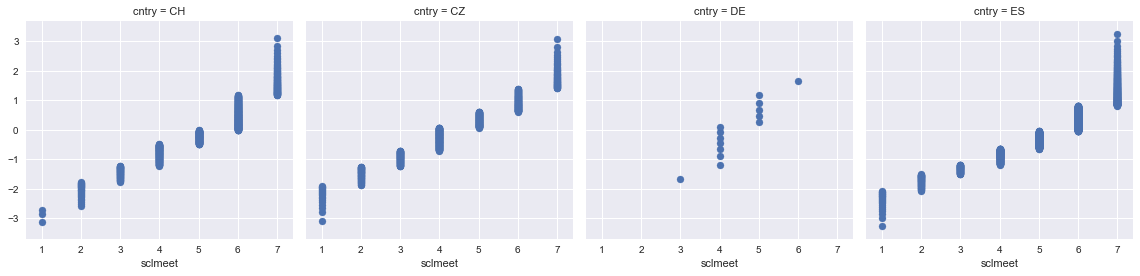

In [364]:
g = sns.FacetGrid(temp_5, col = "cntry", size = 4)
g.map(quantile_plot, "sclmeet");

In [390]:
# number of rows from df_5 that are not null
dat_5 = list(temp_5.groupby('cntry').count().sort_values(by = ['year'], ascending = False)['year'])

# join samples into a list and create ranks for them
ranks_5 = stats.rankdata(
    df_5['ES_sclmeet'][:dat_5[0]].tolist() + df_5['CH_sclmeet'][:dat_5[1]].tolist() +
    df_5['CZ_sclmeet'][:dat_5[2]].tolist() + df_5['DE_sclmeet'][:dat_5[3]].tolist())

# declare the 4 groups of countries
nation = []
for i, v in enumerate(countries):
    nation.append(np.repeat(v, dat_5[i]))

# join the arrays
nation = np.concatenate(nation)

# use pairwise turkey for multiple comparision 
tukey_5 = pairwise_tukeyhsd(endog = ranks_5,      # Data
                            groups = nation,   # Groups
                            alpha = 0.05)         # Significance level

tukey_5.summary()  

group1,group2,meandiff,lower,upper,reject
CH,CZ,-353.4578,-452.6788,-254.2367,True
CH,DE,-482.4578,-986.9104,21.9948,False
CH,ES,78.5988,-7.4919,164.6895,False
CZ,DE,-129.0,-634.2362,376.2362,False
CZ,ES,432.0565,341.4874,522.6257,True
DE,ES,561.0565,58.2341,1063.879,True


#### For multiple testing/comparison, does tukey work for both parametric and non-parametric

    Conclusion:

**___**

##### Question 6:
    Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

    Conclusion:

**___**